In [34]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [35]:
def synthetic_data(w, b, num_examples): 
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [36]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.0681, -0.1265]) 
label: tensor([4.7807])


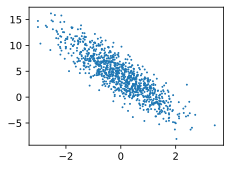

In [37]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [38]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.6574,  1.4137],
        [ 1.6703, -0.4005],
        [ 0.1742, -0.4784],
        [-0.0172, -0.8236],
        [-1.1436,  0.0107],
        [ 0.5096, -0.1070],
        [-1.2286, -0.6946],
        [ 0.4794,  0.7345],
        [ 1.2264,  1.0119],
        [ 0.3338,  0.5480]]) 
 tensor([[-1.9255],
        [ 8.8886],
        [ 6.1591],
        [ 6.9483],
        [ 1.8799],
        [ 5.5838],
        [ 4.1080],
        [ 2.6870],
        [ 3.2143],
        [ 3.0075]])


In [39]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [40]:
def linreg(X, w, b): 
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [41]:
 def squared_loss(y_hat, y): 
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [42]:
def sgd(params, lr, batch_size): 
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [43]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.032421
epoch 2, loss 0.000119
epoch 3, loss 0.000054


In [44]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0002, 0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0010], grad_fn=<RsubBackward1>)
